In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pickle

mpl.rcParams.update({'font.size': 14, 'axes.labelsize': 'medium', 'axes.titlesize': 'medium', 'legend.fontsize': 12})

In [2]:
def fold_analysis(run_name):
    dfs_fold = []
    for foldnum in [0, 2, 4, 6, 8]:
        df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_fold{foldnum}_{run_name}/summary_results.csv')
        df_fold['test_fold'] = foldnum/2
        dfs_fold += [df_fold]
    dfs_fold = pd.concat(dfs_fold)
    for foldnum in np.arange(5):
        print(foldnum, dfs_fold[dfs_fold['test_fold'] == foldnum].recovery.mean(), dfs_fold[dfs_fold['test_fold'] == foldnum].dtermen_recovery.mean())
    print('COMBINED', dfs_fold.recovery.mean(), dfs_fold.dtermen_recovery.mean())
    for foldnum in np.arange(5):
        fig, ax = plt.subplots(figsize=(6,4.5))
        sns.scatterplot(data = dfs_fold[dfs_fold['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
        ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
        ax.set_xlim([0, dfs_fold.recovery.max()+1])
        ax.set_ylim([0, dfs_fold.recovery.max()+1])
        ax.set_xlabel('Percent Recovery from dTERMen')
        ax.set_ylabel(f'Percent Recovery from TERMinator {run_name}')
        ax.set_title(f'Fold {foldnum}')
        
    for foldnum in [0, 2, 4, 6, 8]:
        fig, ax = plt.subplots(figsize=(6,4.5))
        with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_fold{foldnum}_{run_name}/training_curves.pk', 'rb') as f:
            training_curve = pickle.load(f)
        train, test = zip(*training_curve)
        ax.plot(np.arange(len(train)), train)
        ax.plot(np.arange(len(test)), test)
        ax.set_ylim([45, 60])
        ax.set_title(f'Fold {foldnum}')

In [6]:
def perplexity(run_name):
    perplexity = []
    for foldnum in [0, 2, 4, 6, 8]:
        with open(f'/scratch/users/alexjli/TERMinator_runs/test_run_fold{foldnum}_{run_name}/perplexity.log') as fp:
            fp.readline()
            p = float(fp.readline().strip())
            perplexity.append(p)
        print(foldnum, p)
    print('combined', np.mean(perplexity))

# TERMinator reg

In [2]:
dfs_fold = []
for foldnum in [0, 2, 4, 6, 8]:
    df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator/outputs/test_run_fold{foldnum}_pyold/summary_results.csv')
    df_fold['test_fold'] = foldnum/2
    dfs_fold += [df_fold]
dfs_fold = pd.concat(dfs_fold)

In [3]:
for foldnum in np.arange(5):
    print(foldnum, dfs_fold[dfs_fold['test_fold'] == foldnum].recovery.mean(), dfs_fold[dfs_fold['test_fold'] == foldnum].dtermen_recovery.mean())
print('COMBINED', dfs_fold.recovery.mean(), dfs_fold.dtermen_recovery.mean())

0 28.138844327086883 26.821649659284496
1 27.489818974358972 25.65140564102564
2 25.705684438775513 27.301783775510206
3 29.303070977701545 26.961326586620924
4 28.41195549319728 26.521343758503402
COMBINED 27.807542947799387 26.651938942340497


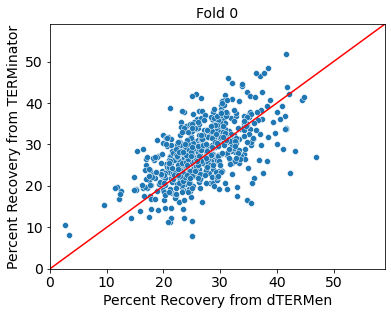

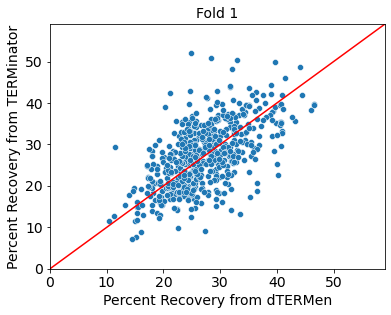

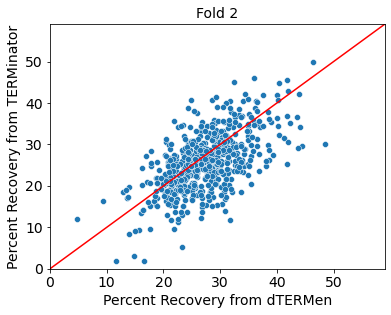

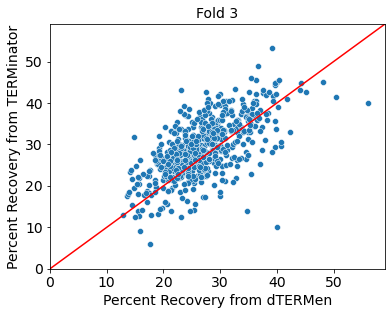

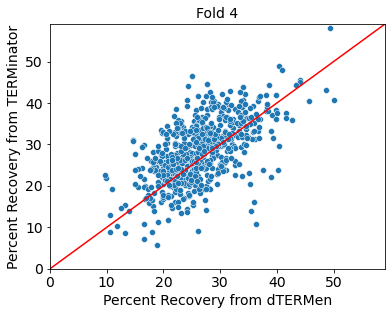

In [4]:
for foldnum in np.arange(5):
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold[dfs_fold['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold.recovery.max()+1])
    ax.set_ylim([0, dfs_fold.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel('Percent Recovery from TERMinator')
    ax.set_title(f'Fold {foldnum}')

# TERMinator no reg

In [5]:
dfs_fold_noreg = []
for foldnum in [0, 2, 4, 6, 8]:
    df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator/outputs/test_run_fold{foldnum}_pyold_noreg/summary_results.csv')
    df_fold['test_fold'] = foldnum/2
    dfs_fold_noreg += [df_fold]
dfs_fold_noreg = pd.concat(dfs_fold_noreg)

In [6]:
for foldnum in np.arange(5):
    print(foldnum, dfs_fold_noreg[dfs_fold_noreg['test_fold'] == foldnum].recovery.mean(), dfs_fold_noreg[dfs_fold_noreg['test_fold'] == foldnum].dtermen_recovery.mean())
print('COMBINED', dfs_fold_noreg.recovery.mean(), dfs_fold_noreg.dtermen_recovery.mean())

0 36.71078204429301 26.820857325383304
1 38.70413682051282 25.65140564102564
2 37.09018986394558 27.301783775510206
3 38.93563042881647 26.961326586620924
4 37.58542596938776 26.521343758503402
COMBINED 37.80275801774139 26.651780259297166


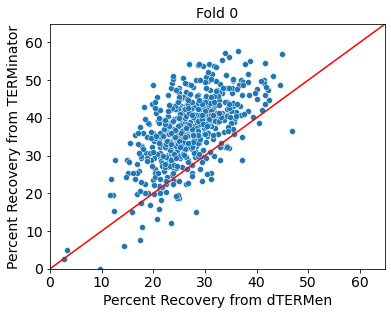

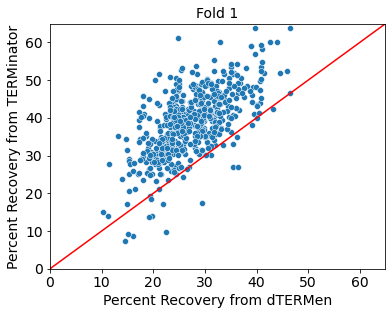

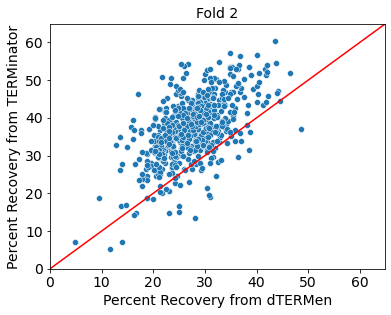

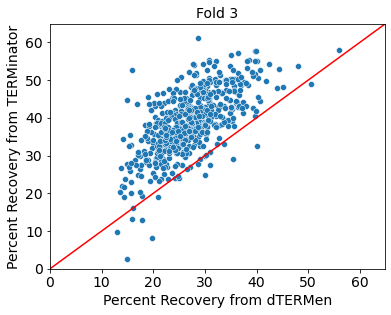

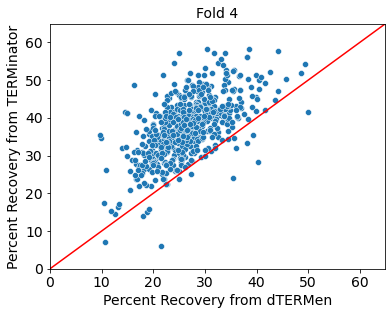

In [7]:
for foldnum in np.arange(5):
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold_noreg[dfs_fold_noreg['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold_noreg.recovery.max()+1])
    ax.set_ylim([0, dfs_fold_noreg.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel('Percent Recovery from TERMinator')
    ax.set_title(f'Fold {foldnum}')

# Linear + S2S

In [12]:
dfs_fold_linear_s2s = []
for foldnum in [0, 2, 4, 6, 8]:
    df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator/outputs/test_run_fold{foldnum}_linear_s2s/summary_results.csv')
    df_fold['test_fold'] = foldnum/2
    dfs_fold_linear_s2s += [df_fold]
dfs_fold_linear_s2s = pd.concat(dfs_fold_linear_s2s)

In [13]:
for foldnum in np.arange(5):
    print(foldnum, dfs_fold_linear_s2s[dfs_fold_linear_s2s['test_fold'] == foldnum].recovery.mean(), dfs_fold_linear_s2s[dfs_fold_linear_s2s['test_fold'] == foldnum].dtermen_recovery.mean())
print('COMBINED', dfs_fold_linear_s2s.recovery.mean(), dfs_fold_linear_s2s.dtermen_recovery.mean())

0 35.68375282793867 26.820857325383304
1 35.92476567521368 25.65140564102564
2 36.21756448979592 27.301783775510206
3 35.366525368782156 26.961326586620924
4 34.83506224489796 26.521343758503402
COMBINED 35.60558841351075 26.651780259297166


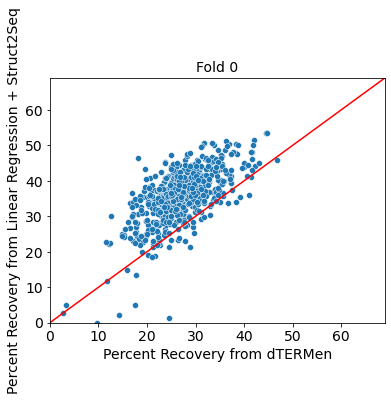

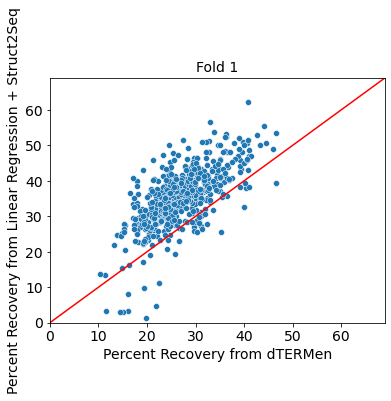

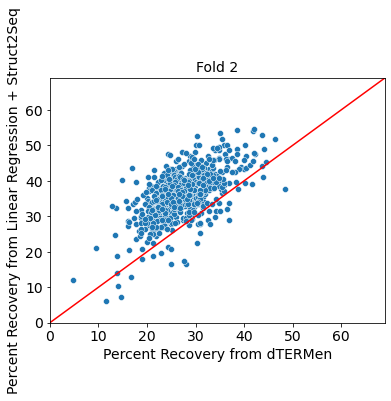

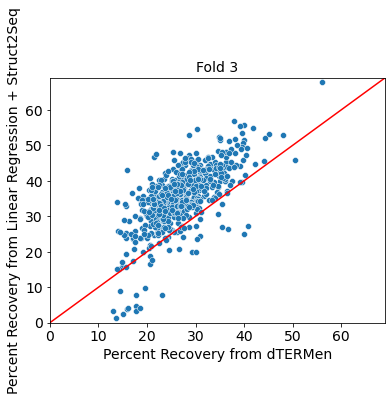

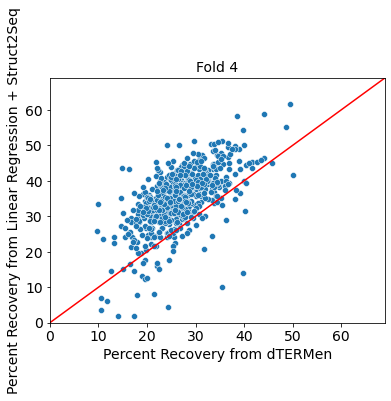

In [14]:
for foldnum in np.arange(5):
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold_linear_s2s[dfs_fold_linear_s2s['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold_linear_s2s.recovery.max()+1])
    ax.set_ylim([0, dfs_fold_linear_s2s.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel('Percent Recovery from Linear Regression + Struct2Seq')
    ax.set_title(f'Fold {foldnum}')

# S2S

In [15]:
dfs_fold_s2s = []
for foldnum in [0, 2, 4, 6, 8]:
    df_fold = pd.read_csv(f'/scratch/users/vsundar/TERMinator/outputs/test_run_fold{foldnum}_s2s/summary_results.csv')
    df_fold['test_fold'] = foldnum/2
    dfs_fold_s2s += [df_fold]
dfs_fold_s2s = pd.concat(dfs_fold_s2s)

In [16]:
for foldnum in np.arange(5):
    print(foldnum, dfs_fold_s2s[dfs_fold_s2s['test_fold'] == foldnum].recovery.mean(), dfs_fold_s2s[dfs_fold_s2s['test_fold'] == foldnum].dtermen_recovery.mean())
print('COMBINED', dfs_fold_s2s.recovery.mean(), dfs_fold_s2s.dtermen_recovery.mean())

0 33.23662499148212 26.820857325383304
1 32.87698018803419 25.65140564102564
2 32.44200756802721 27.301783775510206
3 32.34105718696398 26.961326586620924
4 32.659836105442174 26.521343758503402
COMBINED 32.71158399863528 26.651780259297166


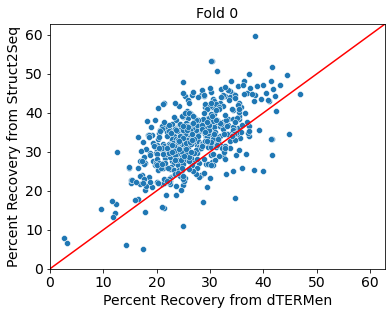

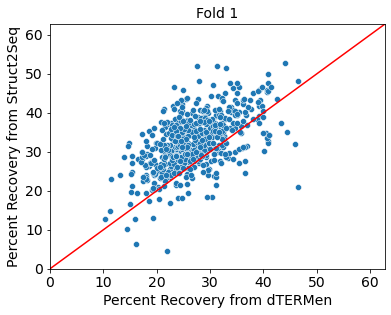

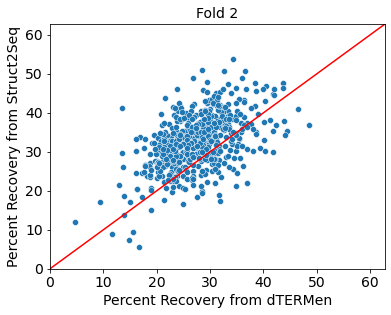

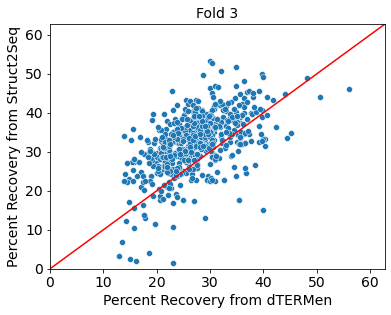

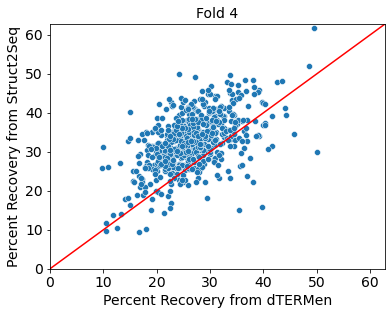

In [17]:
for foldnum in np.arange(5):
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold_s2s[dfs_fold_s2s['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold_s2s.recovery.max()+1])
    ax.set_ylim([0, dfs_fold_s2s.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel('Percent Recovery from Struct2Seq')
    ax.set_title(f'Fold {foldnum}')

# Covariance features + TERM mpnn

In [2]:
dfs_fold_cov_features_term_mpnn = []
for foldnum in [0, 2, 4, 6, 8]:
    df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_fold{foldnum}_cov_features_term_mpnn/summary_results.csv')
    df_fold['test_fold'] = foldnum/2
    dfs_fold_cov_features_term_mpnn += [df_fold]
dfs_fold_cov_features_term_mpnn = pd.concat(dfs_fold_cov_features_term_mpnn)

In [3]:
for foldnum in np.arange(5):
    print(foldnum, dfs_fold_cov_features_term_mpnn[dfs_fold_cov_features_term_mpnn['test_fold'] == foldnum].recovery.mean(), dfs_fold_cov_features_term_mpnn[dfs_fold_cov_features_term_mpnn['test_fold'] == foldnum].dtermen_recovery.mean())
print('COMBINED', dfs_fold_cov_features_term_mpnn.recovery.mean(), dfs_fold_cov_features_term_mpnn.dtermen_recovery.mean())

0 37.68399286926995 26.82687393887946
1 38.37971212224109 27.30756859083192
2 38.41051444821731 27.253733208828525
3 37.93085838709678 27.04951697792869
4 37.02969682512734 26.582093089983022
COMBINED 37.886954930390495 27.003957161290327


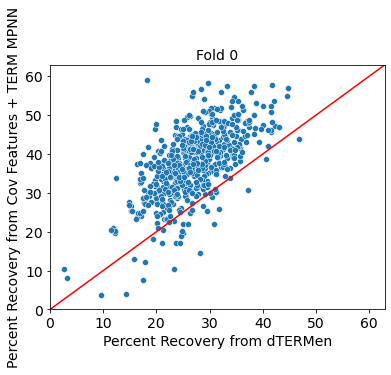

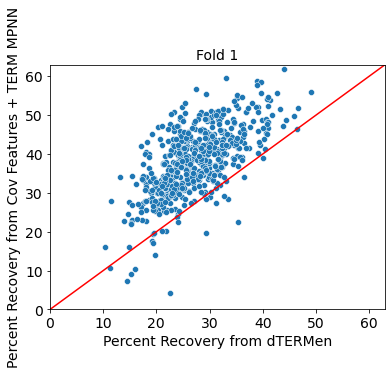

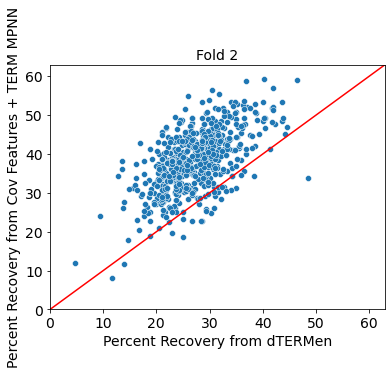

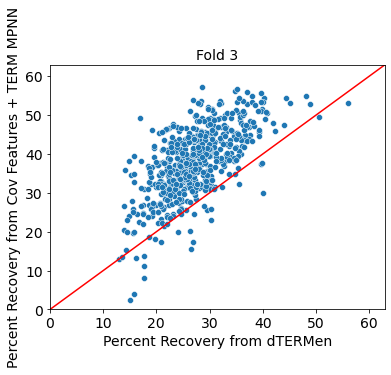

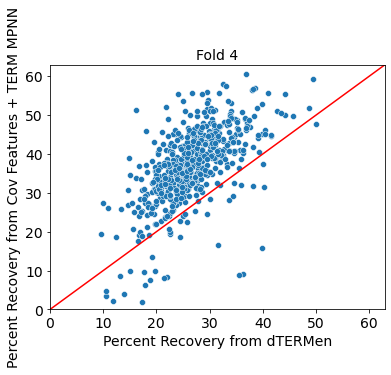

In [4]:
for foldnum in np.arange(5):
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold_cov_features_term_mpnn[dfs_fold_cov_features_term_mpnn['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold_cov_features_term_mpnn.recovery.max()+1])
    ax.set_ylim([0, dfs_fold_cov_features_term_mpnn.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel('Percent Recovery from Cov Features + TERM MPNN')
    ax.set_title(f'Fold {foldnum}')

# Covariance raw + full mpnn

0 39.34035933786078 26.88635373514431
1 40.40190589134126 27.30756859083192
2 38.46217615449915 27.30603830220713
3 40.098984753820034 27.107048217317487
4 37.70893767402377 26.582093089983022
COMBINED 39.20247276230899 27.037820387096776


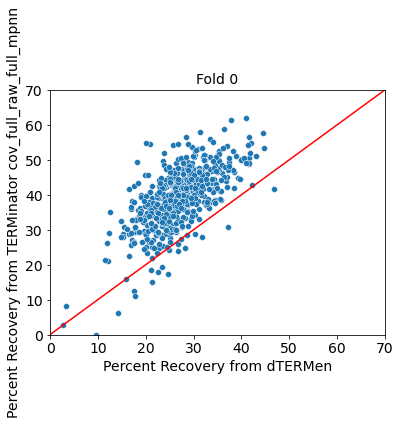

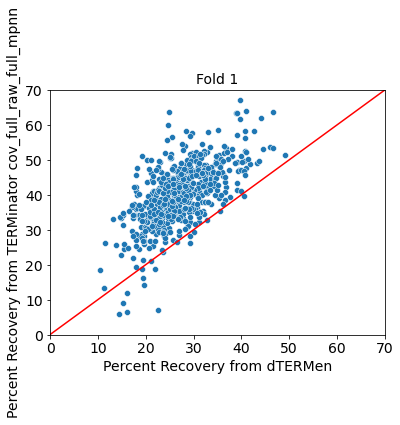

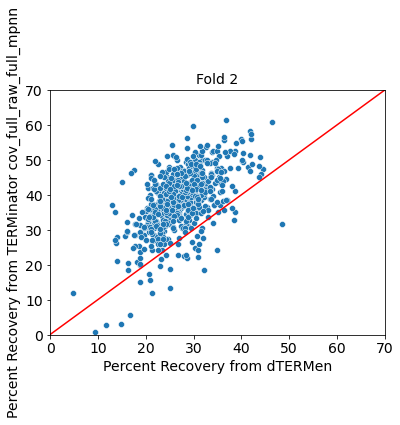

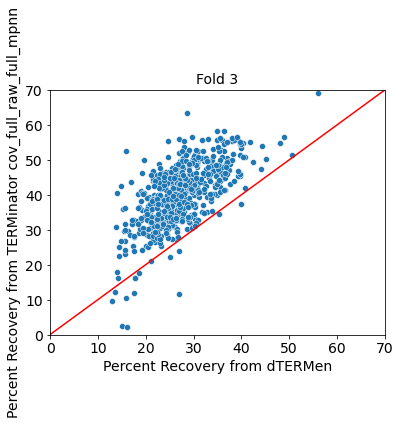

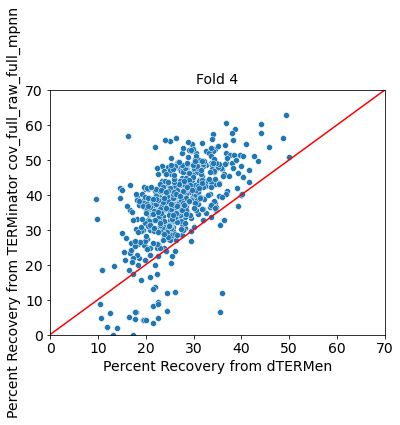

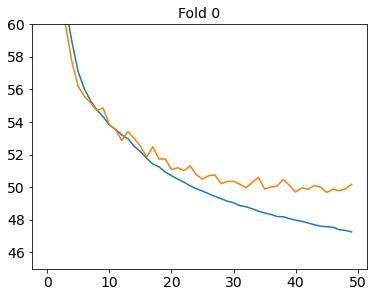

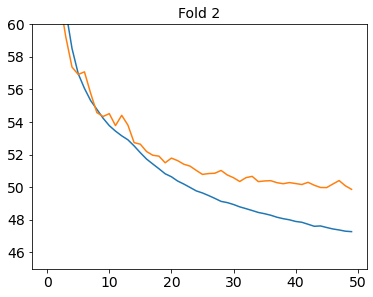

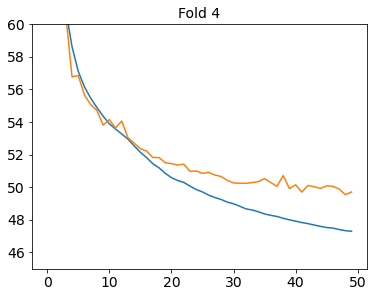

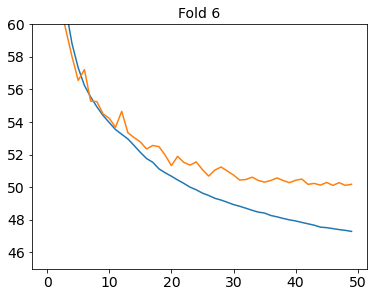

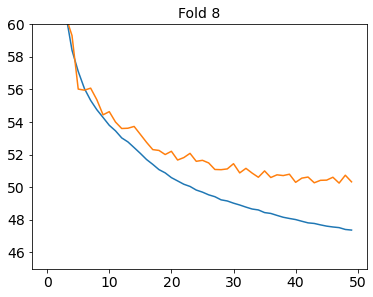

In [37]:
fold_analysis("cov_full_raw_full_mpnn")

# Cov features ffn + full mpnn + matches transformer

0 39.100886827956984 26.796860304659496
1 40.37339332767402 27.30756859083192
2 38.24784522920204 27.30603830220713
3 38.99949225473321 27.101030464716008
4 39.893929089983025 26.582093089983022
COMBINED 39.32637081693049 27.020858238128007


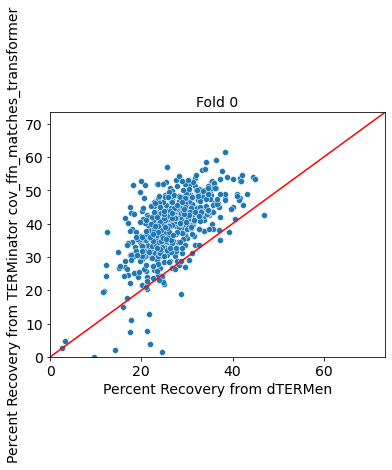

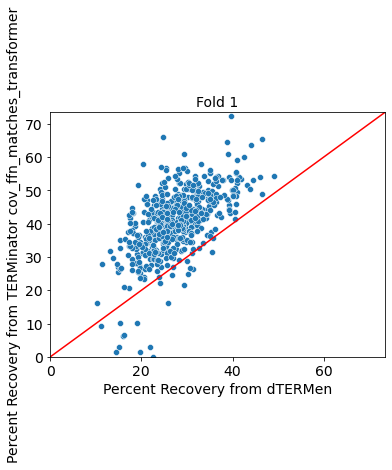

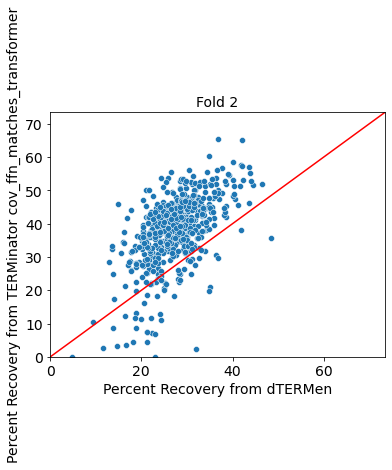

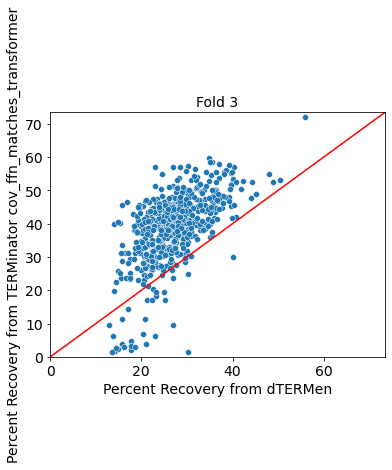

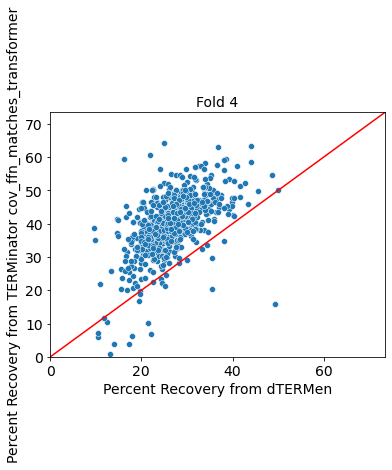

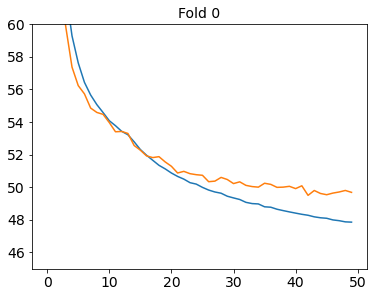

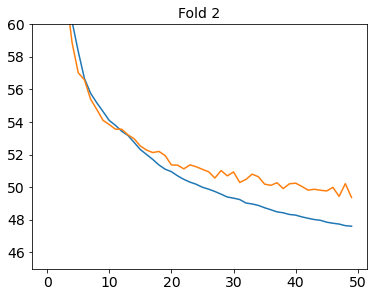

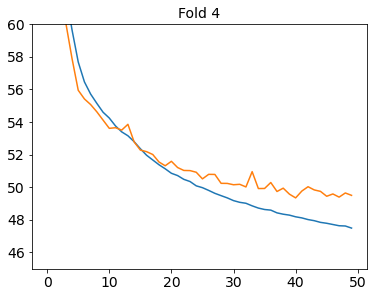

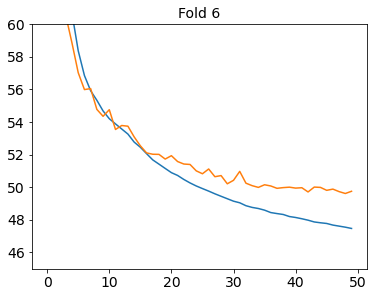

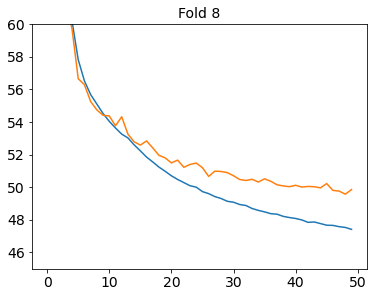

In [34]:
fold_analysis("cov_ffn_matches_transformer")

In [8]:
perplexity("cov_ffn_matches_transformer")

0 5.710745334625244
2 5.475593566894531
4 5.601658821105957
6 5.581416606903076
8 5.691415786743164
combined 5.612166023254394


# Contact idx

0 37.75444003395586 26.88635373514431
1 40.1505441426146 27.30756859083192
2 40.326498268251264 27.30603830220713
3 39.548437470288626 27.107048217317487
4 39.5198689541596 26.582093089983022
COMBINED 39.459957773853986 27.037820387096776


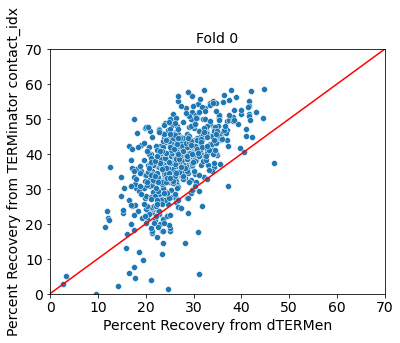

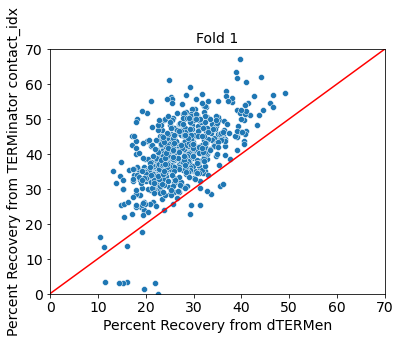

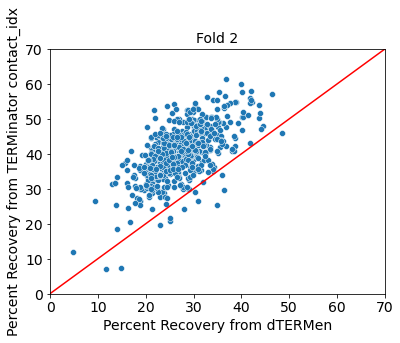

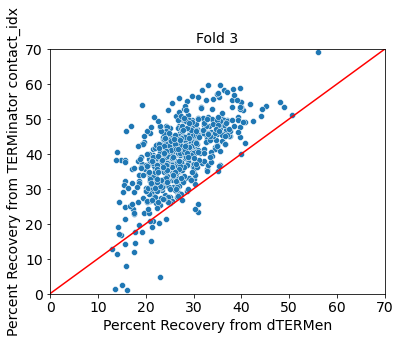

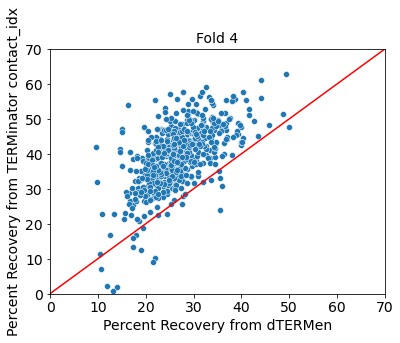

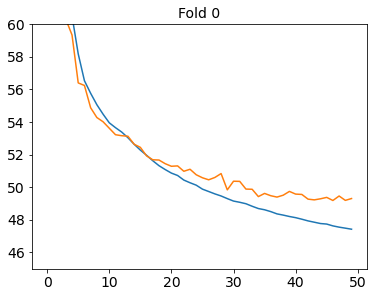

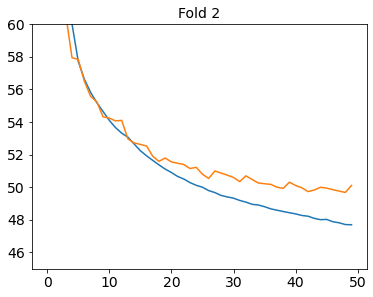

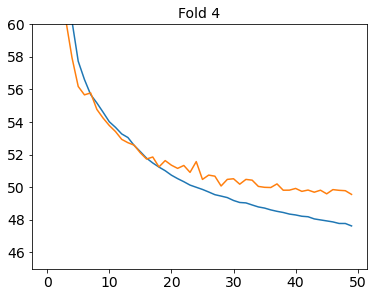

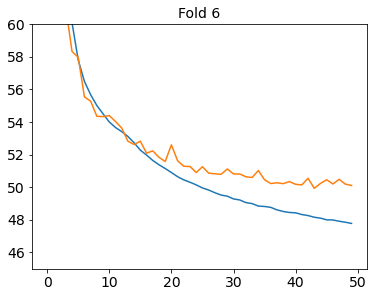

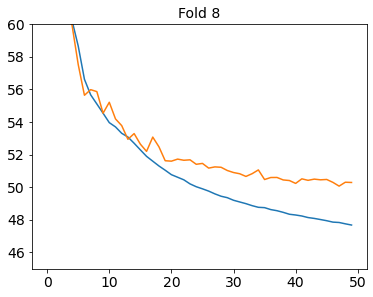

In [33]:
fold_analysis("contact_idx")

In [7]:
perplexity("contact_idx")

0 5.616021633148193
2 5.610123157501221
4 5.611856937408447
6 5.657721042633057
8 5.783606052398682
combined 5.65586576461792


# Sing + Cov preprocessed features

0 38.13005998302207 26.88635373514431
1 39.669322190152805 27.30756859083192
2 39.57325887945671 27.30603830220713
3 39.33115838709677 27.107048217317487
4 39.193145840407475 26.582093089983022
COMBINED 39.17938905602716 27.037820387096776


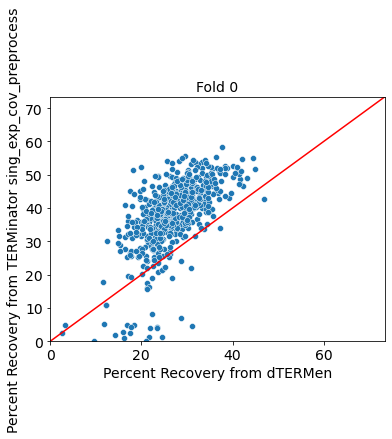

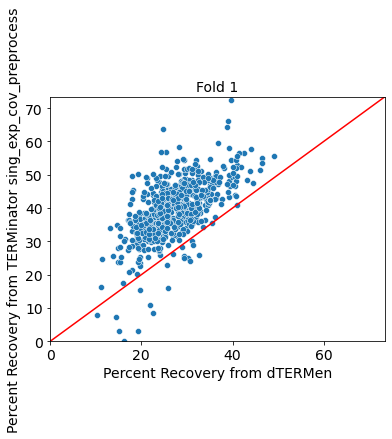

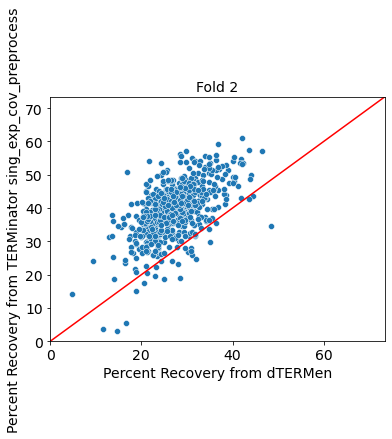

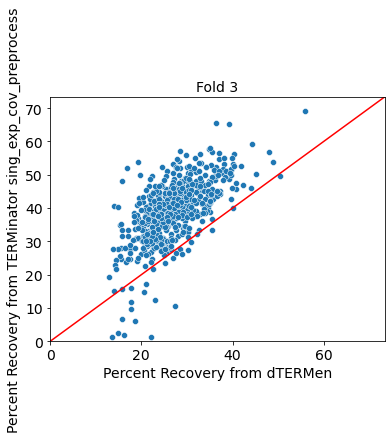

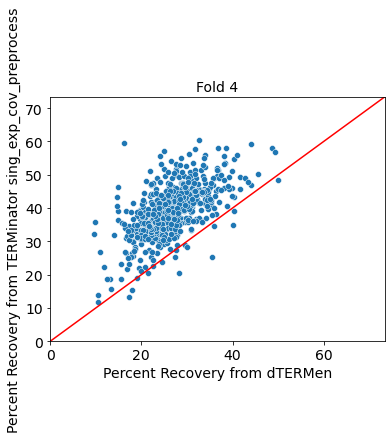

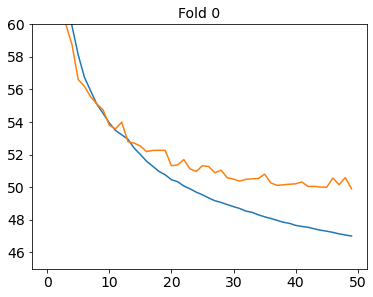

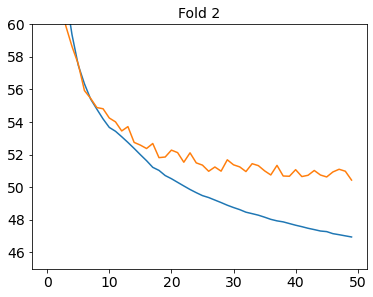

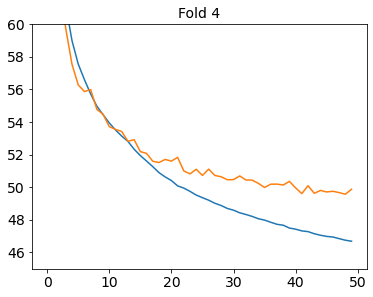

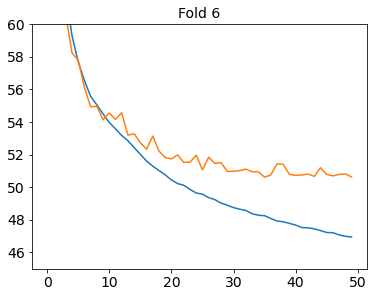

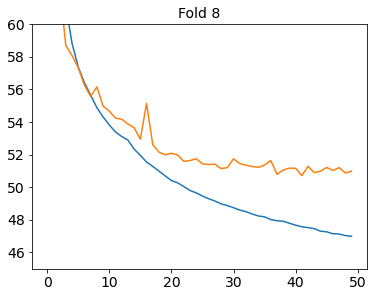

In [11]:
fold_analysis("sing_exp_cov_preprocess")

In [12]:
perplexity("sing_exp_cov_preprocess")

0 5.892060279846191
2 5.831559181213379
4 5.6853814125061035
6 5.752490997314453
8 5.952385425567627
combined 5.82277545928955


# Matches Transformer + MPNN

0 39.43025511035653 26.88635373514431
1 40.4097235483871 27.30756859083192
2 39.55836196943973 27.30603830220713
3 40.09187894736842 27.107048217317487
4 39.571379252971134 26.582093089983022
COMBINED 39.81231976570458 27.037820387096776


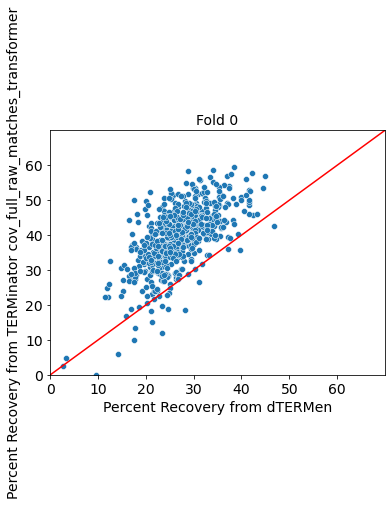

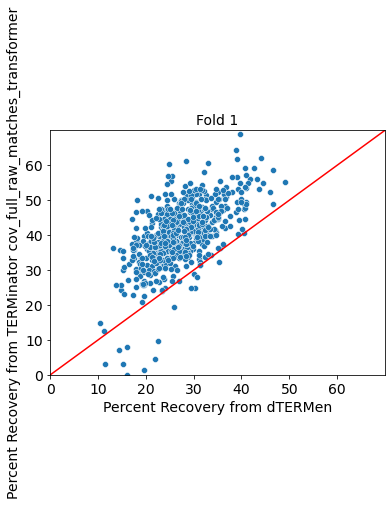

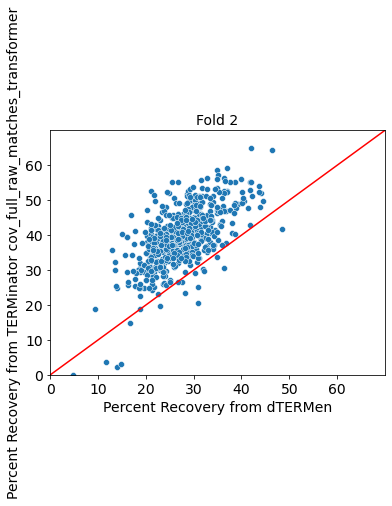

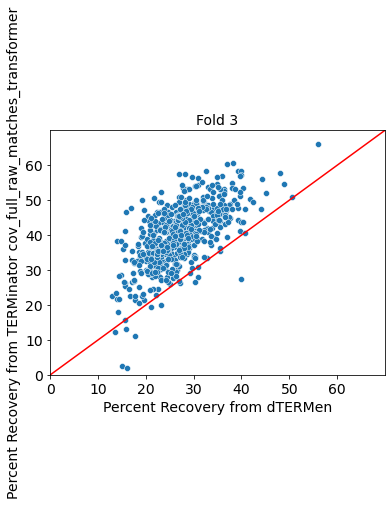

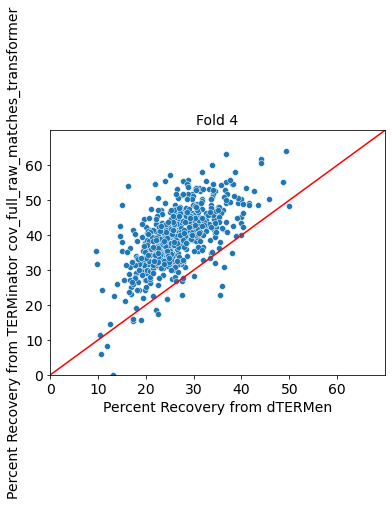

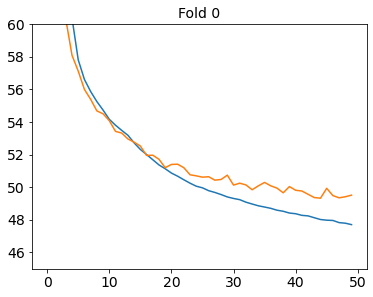

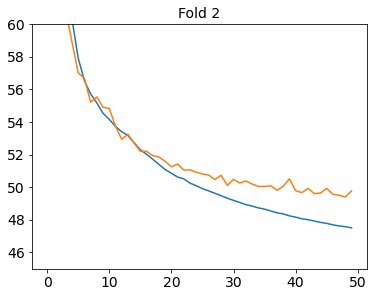

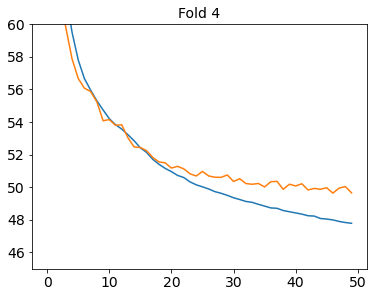

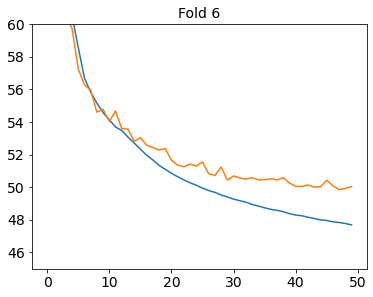

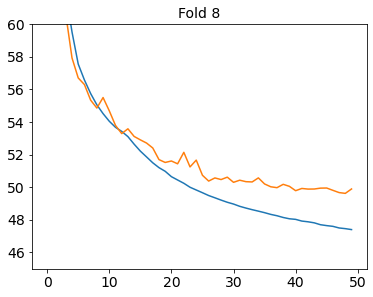

In [36]:
fold_analysis("cov_full_raw_matches_transformer")

In [9]:
perplexity("cov_full_raw_matches_transformer")

0 5.641482353210449
2 5.529365539550781
4 5.639544486999512
6 5.635275363922119
8 5.686152935028076
combined 5.626364135742188


# Cov ffn Matches Transformer Contact Idx

0 39.91888492359932 26.88635373514431
1 40.03205516129033 27.30756859083192
2 40.16777434634974 27.30603830220713
3 39.727242852292015 27.107048217317487
4 39.58872884550085 26.582093089983022
COMBINED 39.88693722580645 27.037820387096776


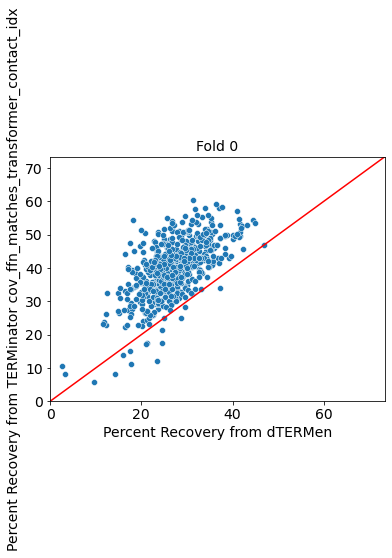

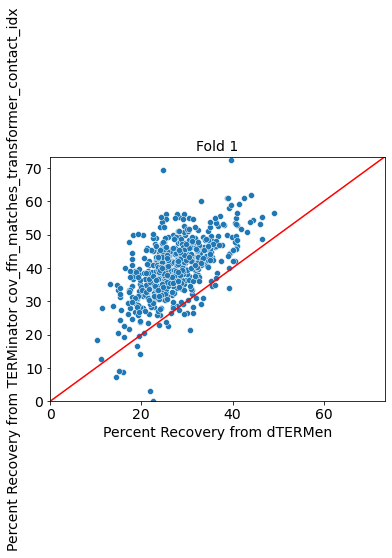

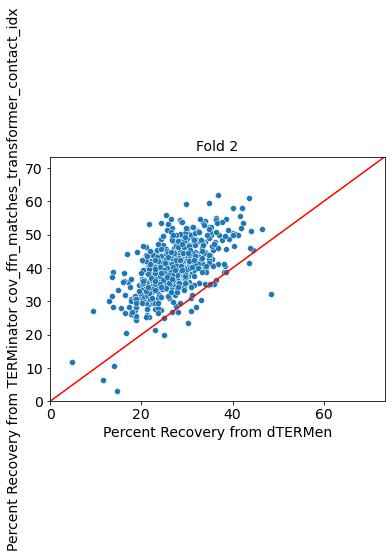

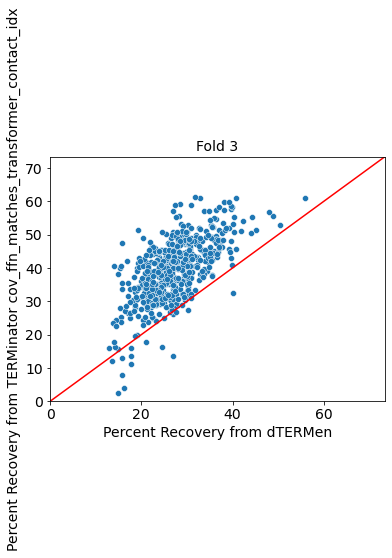

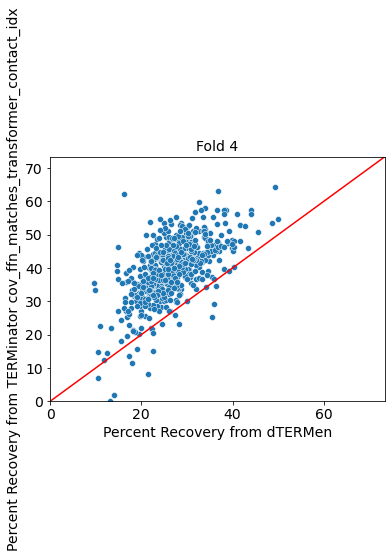

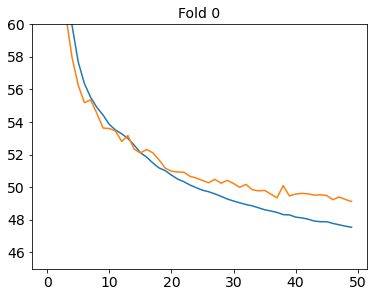

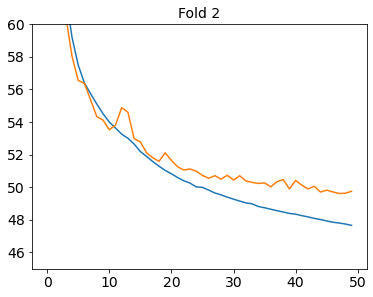

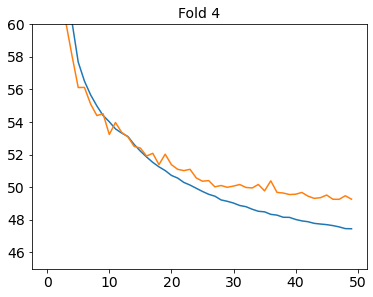

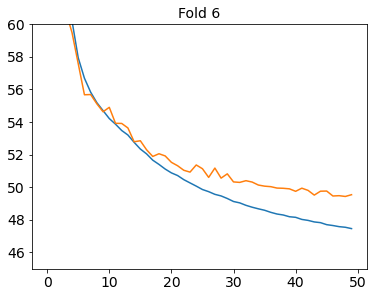

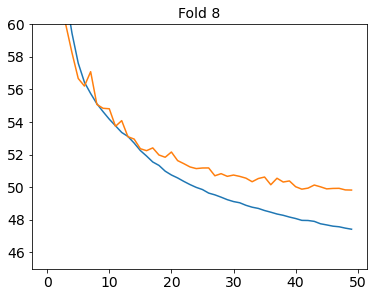

In [3]:
fold_analysis("cov_ffn_matches_transformer_contact_idx")

In [10]:
perplexity("cov_ffn_matches_transformer_contact_idx")

0 5.600836277008057
2 5.570301055908203
4 5.595852851867676
6 5.558939456939697
8 5.679286479949951
combined 5.601043224334717


# TERM Matches Transformer

In [5]:
dfs_fold_matches_transformer = []
for foldnum in [0, 2, 4, 6, 8]:
    df_fold = pd.read_csv(f'/scratch/users/alexjli/TERMinator_runs/test_run_fold{foldnum}_matches_transformer/summary_results.csv')
    df_fold['test_fold'] = foldnum/2
    dfs_fold_matches_transformer += [df_fold]
dfs_fold_matches_transformer = pd.concat(dfs_fold_matches_transformer)

In [6]:
for foldnum in np.arange(5):
    print(foldnum, dfs_fold_matches_transformer[dfs_fold_matches_transformer['test_fold'] == foldnum].recovery.mean(), dfs_fold_matches_transformer[dfs_fold_matches_transformer['test_fold'] == foldnum].dtermen_recovery.mean())
print('COMBINED', dfs_fold_matches_transformer.recovery.mean(), dfs_fold_matches_transformer.dtermen_recovery.mean())

0 35.782078115449906 26.82687393887946
1 39.644082444821734 27.30756859083192
2 38.455549983022074 27.253733208828525
3 38.026052378607815 27.04951697792869
4 36.927674159592534 26.582093089983022
COMBINED 37.76708741629881 27.003957161290327


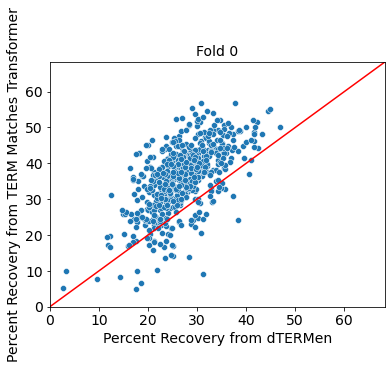

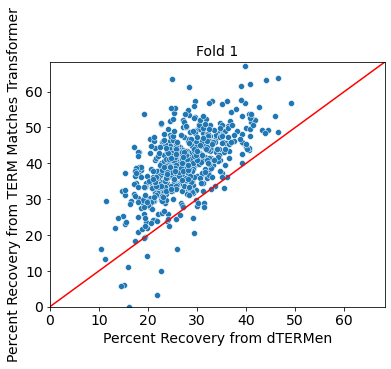

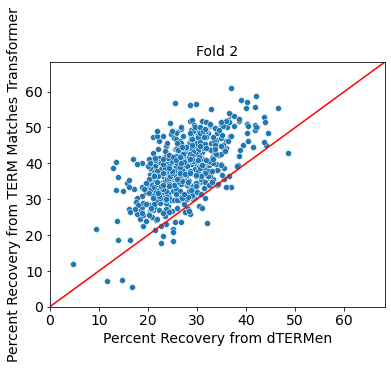

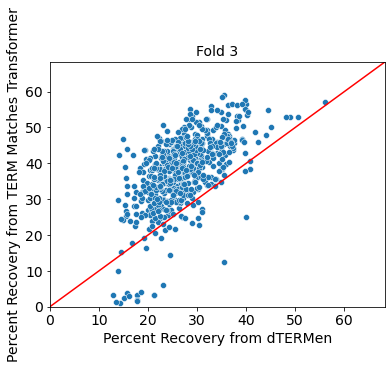

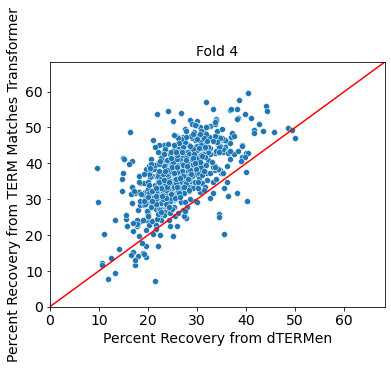

In [7]:
for foldnum in np.arange(5):
    fig, ax = plt.subplots(figsize=(6,4.5))
    sns.scatterplot(data = dfs_fold_matches_transformer[dfs_fold_matches_transformer['test_fold'] == foldnum], x='dtermen_recovery', y='recovery', ax=ax)
    ax.plot(np.arange(0, 100), np.arange(0, 100), c='red', ls='-')
    ax.set_xlim([0, dfs_fold_matches_transformer.recovery.max()+1])
    ax.set_ylim([0, dfs_fold_matches_transformer.recovery.max()+1])
    ax.set_xlabel('Percent Recovery from dTERMen')
    ax.set_ylabel('Percent Recovery from TERM Matches Transformer')
    ax.set_title(f'Fold {foldnum}')

In [18]:
dfs_fold_noreg['model'] = 'TERMinator_noreg'
dfs_fold['model'] = 'TERMinator_reg'
dfs_fold_linear_s2s['model'] = 'linear_s2s'
dfs_fold_s2s['model'] = 's2s'

In [64]:
dfs_fold

ids                                     pred_sequences  \
0    3KXR  GGLVDRLTPEELVRLLEELPLEVLEELLRALSPEELRRLLLLLRFP...   
1    3VYK  ALPPGWAAFGAALALAAAAAAAAPADAAAALAAAGAALAVVRSLPE...   
2    1BDO  GLRGVVVRAPVDGVVVLSPSPEGEPLVRVGERVRRGELLLVVVRDG...   
3    4BHX  APLAPAAAAAALAALAFAPALGPAAALAALAALAAAALAPAALTPE...   
4    3MC4  AAGAAAHAPLAAALAAAAAALLAAAPAAAAALAAALLAHAALAAAL...   
..    ...                                                ...   
583  4HSP  EKPKKLTPADLLPAGAPPAAAAAAAAAAAAAAAAAGAAAAAAAAAA...   
584  3H6R  AAGLPAGTYTLVATTTAAPTPGPGPLALTATGAGRPVTLAPLTPPT...   
585  1H1O  APAACAACAGTATTPAPSPTFPALAGAPAAYLVAALAAVAAGALAA...   
586  1UUX  GPKIKILIITISDKIYKGEKEDITGPEIIKEIKENKEELGGAEVIG...   
587  3ZR8  APAVAAAVAAAAAAVAADPAAAAAVAAAAAAAGLTAAAAAAALASA...   

                                        real_sequences  \
0    DLLFAQLSPEDLIEWSDYLPESFTDRALAQMGERQRQRFELYDQYS...   
1    SCPKDWKPFVSHCYFILNDSKASWNESEEKCSHMGAHLVVIHSQAE...   
2    EISGHIVRSPMVGTFYRTPSPDAKAFIEVGQKVNVGDTLCIVEAMK...   
3    HMTDSEFFHQRFRNLIYVEFVGPRKTLIKLRNLCLDWLQPETRTKE...   
4    NAGLDQVDPIWHSIRAEAEEATRNDPVLGAFLYATILNQPSLEEAV...   
..                                                 ...   
583  GAPRELTWSQLIPAGAPPAPAPLPIHDLANALSEAGPAASQQSPNA...   
584  MASLEDGTYRLRAVTTHNPDPGVGGEYATVEGARQPVKAEPSTPPF...   
585  VSSDCMVCHGMTGRDTLYPIVPRLAGQHKSYMEAQLKAYKDHSRAD...   
586  GPEYKVAILTVSDTVSAGAGPDRSGPRAVSVVDSSSEKLGGAKVVA...   
587  GPTEKAAVKKMAKAIMADPSKADDVYQKWADKGYTLTQLSDFLKSK...   

                                dtermen_pred_sequences  recovery  \
0    GDELSRTSPELIAQLSDRLPQEIIDELIRSLSPELLLKLEALKKVD...   23.6686   
1    DCPPGWELFNDKCYYVNTSSLHTWEEAEKLCESKGSHLVSIHSEEE...   21.8750   
2    KKEGVILLSPRKGIAELVSSPELPSDVREGDEVKAGQPLAIILKDG...   32.5000   
3    EPTDPEKVKKLLEELEEDEDIGEERKEKAEKEARELTERPEEHTEE...   30.0000   
4    DEGPERNSPLLKLAEELARKALEEDPSQLELLIALVLEADSLKLIL...   33.3333   
..                                                 ...       ...   
583  GPPEPLTEASLLPEGLPPPPDAKPPPELLEALEKLPDELADPLTAL...   41.4966   
584  EGGAPPGRVVVVLVSAADYDKGPGPLVVALAGKDLPVLVVPPTPEN...   33.5526   
585  RPERCLKEHGSEKVPSPSPEIPLLAGLPEEVLRKILEAVRDKSILA...   29.0698   
586  KSLIVVVVLLVSKEIAEGRRPIKVLPLAVKLIKDNYEKLGGAKVRL...   36.6460   
587  DEEEKKELLKRAEELRKDPSLLEEFLEEAIKAGLTPEEVEKLLESP...   26.1538   

     dtermen_recovery  test_fold           model  
0             23.0769        0.0  TERMinator_reg  
1             35.9375        0.0  TERMinator_reg  
2             30.0000        0.0  TERMinator_reg  
3             23.3333        0.0  TERMinator_reg  
4             27.5720        0.0  TERMinator_reg  
..                ...        ...             ...  
583           28.5714        4.0  TERMinator_reg  
584           29.6053        4.0  TERMinator_reg  
585           31.3953        4.0  TERMinator_reg  
586           33.5404        4.0  TERMinator_reg  
587           21.5385        4.0  TERMinator_reg  

[2931 rows x 8 columns]

In [19]:
dfs_fold_noreg = dfs_fold_noreg.drop('Unnamed: 0', axis=1)
dfs_fold = dfs_fold.drop('Unnamed: 0', axis=1)
dfs_fold_linear_s2s = dfs_fold_linear_s2s.drop('Unnamed: 0', axis=1)
dfs_fold_s2s = dfs_fold_s2s.drop('Unnamed: 0', axis=1)

In [20]:
id_values = []
model_values = []
pred_sequence_values = []
real_sequence_values = []
recovery_values = []
test_fold_values = []
term_len_values = []
seq_len_values = []
for row in dfs_fold_linear_s2s.iterrows():
    reg_row = dfs_fold.loc[dfs_fold['ids'] == row[1].ids]
    noreg_row = dfs_fold_noreg.loc[dfs_fold_noreg['ids'] == row[1].ids]
    s2s_row = dfs_fold_s2s.loc[dfs_fold_s2s['ids'] == row[1].ids]
    id_values += [row[1].ids, row[1].ids, row[1].ids, row[1].ids, row[1].ids]
    model_values += ['TERMinator_noreg', 'TERMinator_reg', 'linear_s2s', 'dTERMen', 's2s']
    pred_sequence_values += [noreg_row.pred_sequences.values[0], reg_row.pred_sequences.values[0], row[1].pred_sequences, row[1].dtermen_pred_sequences, s2s_row.pred_sequences.values[0]]
    real_sequence_values += [row[1].real_sequences, row[1].real_sequences, row[1].real_sequences, row[1].real_sequences, row[1].real_sequences]
    recovery_values += [noreg_row.recovery.values[0], reg_row.recovery.values[0], row[1].recovery, row[1].dtermen_recovery, s2s_row.recovery.values[0]]
    test_fold_values += [row[1].test_fold, row[1].test_fold, row[1].test_fold, row[1].test_fold, row[1].test_fold]
    with open(f'/scratch/users/alexjli/TERMinator/features_singlechain/{row[1].ids}/{row[1].ids}.length', 'r') as f:
        term_len = int(f.readline().strip())
        term_len_values += [term_len, term_len, term_len, term_len, term_len]
        seq_len = int(f.readline().strip())
        seq_len_values += [seq_len, seq_len, seq_len, seq_len, seq_len]
combined_data = {'id': id_values, 'model': model_values, 'pred_sequence': pred_sequence_values, 'real_sequence': real_sequence_values, 'recovery': recovery_values, 'test_fold': test_fold_values, 'term_len': term_len_values, 'seq_len': seq_len_values}
combined_data = pd.DataFrame(combined_data)

In [21]:
combined_data

id             model  \
0      3KXR  TERMinator_noreg   
1      3KXR    TERMinator_reg   
2      3KXR        linear_s2s   
3      3KXR           dTERMen   
4      3KXR               s2s   
...     ...               ...   
14650  3ZR8  TERMinator_noreg   
14651  3ZR8    TERMinator_reg   
14652  3ZR8        linear_s2s   
14653  3ZR8           dTERMen   
14654  3ZR8               s2s   

                                           pred_sequence  \
0      AAAAAALTPAALAAAAAALPAAALAAAVAAMSPAAAAALARLAAYG...   
1      GGLVDRLTPEELVRLLEELPLEVLEELLRALSPEELRRLLLLLRFP...   
2      MKEVDKITPEDIVKNKDKLPKEKIEKAIESLSEEEKQKLELLEKYP...   
3      GDELSRTSPELIAQLSDRLPQEIIDELIRSLSPELLLKLEALKKVD...   
4      MKKKEKIKIEDIIKNKDKLPKKEIEEFIKKSSEEEKKKLKKLEKYK...   
...                                                  ...   
14650  GPEKKEKIKKKIEEVKKDKKKFPEVFKELEKEGITLEELKKYLESK...   
14651  APAVAAAVAAAAAAVAADPAAAAAVAAAAAAAGLTAAAAAAALASA...   
14652  GEKKKKEIKKEIEKVKKNKKEYPKIEKKLKEEGITLEELKKYAESK...   
14653  DEEEKKELLKRAEELRKDPSLLEEFLEEAIKAGLTPEEVEKLLESP...   
14654  GEKEKKEIKKKAEEIKKNKKKYKKFFKELKKKGYTIKELKKYLKSK...   

                                           real_sequence  recovery  test_fold  \
0      DLLFAQLSPEDLIEWSDYLPESFTDRALAQMGERQRQRFELYDQYS...   27.8107        0.0   
1      DLLFAQLSPEDLIEWSDYLPESFTDRALAQMGERQRQRFELYDQYS...   23.6686        0.0   
2      DLLFAQLSPEDLIEWSDYLPESFTDRALAQMGERQRQRFELYDQYS...   32.5444        0.0   
3      DLLFAQLSPEDLIEWSDYLPESFTDRALAQMGERQRQRFELYDQYS...   23.0769        0.0   
4      DLLFAQLSPEDLIEWSDYLPESFTDRALAQMGERQRQRFELYDQYS...   29.5858        0.0   
...                                                  ...       ...        ...   
14650  GPTEKAAVKKMAKAIMADPSKADDVYQKWADKGYTLTQLSDFLKSK...   29.2308        4.0   
14651  GPTEKAAVKKMAKAIMADPSKADDVYQKWADKGYTLTQLSDFLKSK...   26.1538        4.0   
14652  GPTEKAAVKKMAKAIMADPSKADDVYQKWADKGYTLTQLSDFLKSK...   21.5385        4.0   
14653  GPTEKAAVKKMAKAIMADPSKADDVYQKWADKGYTLTQLSDFLKSK...   21.5385        4.0   
14654  GPTEKAAVKKMAKAIMADPSKADDVYQKWADKGYTLTQLSDFLKSK...   32.3077        4.0   

       term_len  seq_len  
0          3614      171  
1          3614      171  
2          3614      171  
3          3614      171  
4          3614      171  
...         ...      ...  
14650      1133       65  
14651      1133       65  
14652      1133       65  
14653      1133       65  
14654      1133       65  

[14655 rows x 8 columns]

In [22]:
drop_ids = combined_data[(combined_data['model'] == 'dTERMen') & (combined_data['recovery'] == -1)].id.values

In [23]:
combined_data = combined_data.drop(combined_data[[id in drop_ids for id in combined_data['id']]].index)

In [24]:
combined_data_reindex = combined_data.set_index(['id', 'model'])

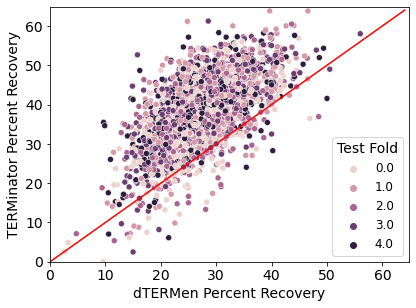

In [25]:
compare_models = combined_data_reindex[['recovery', 'test_fold']].unstack()

fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = compare_models['recovery'], x = 'dTERMen', y='TERMinator_noreg', ax=ax, hue=compare_models['test_fold', 'TERMinator_noreg'])
ax.legend(title = 'Test Fold')
ax.plot(np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), c='red')
ax.set_xlabel('dTERMen Percent Recovery')
ax.set_ylabel('TERMinator Percent Recovery')
ax.set_xlim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)
ax.set_ylim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)

fig.tight_layout()
fig.savefig('TERMinatorvsdTERMen.jpg')

In [26]:
import scipy

slope, intercept, rvalue, pvalue, stderr = scipy.stats.linregress(compare_models['recovery']['dTERMen'].values, compare_models['recovery']['TERMinator_noreg'].values)
print(rvalue**2)

0.38737654853907144


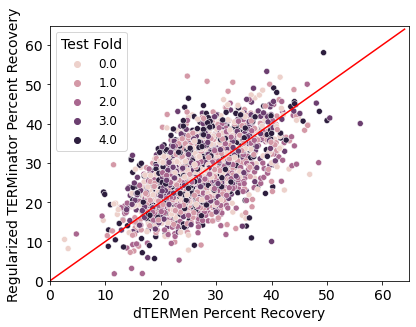

In [27]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = compare_models['recovery'], x = 'dTERMen', y='TERMinator_reg', ax=ax, hue=compare_models['test_fold', 'TERMinator_noreg'])
ax.legend(title = 'Test Fold')
ax.plot(np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), c='red')
ax.set_xlabel('dTERMen Percent Recovery')
ax.set_ylabel('Regularized TERMinator Percent Recovery')
ax.set_xlim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)
ax.set_ylim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)

fig.tight_layout()
fig.savefig('TERMinatorRegvsdTERMen.jpg')

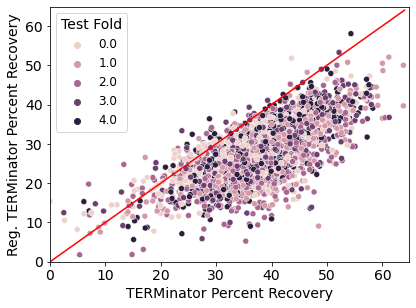

In [28]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = compare_models['recovery'], x = 'TERMinator_noreg', y='TERMinator_reg', ax=ax, hue=compare_models['test_fold', 'TERMinator_noreg'])
ax.legend(title = 'Test Fold')
ax.plot(np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), c='red')
ax.set_xlabel('TERMinator Percent Recovery')
ax.set_ylabel('Reg. TERMinator Percent Recovery')
ax.set_xlim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)
ax.set_ylim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)

fig.tight_layout()
fig.savefig('TERMinatorRegvsTERMinator.jpg')

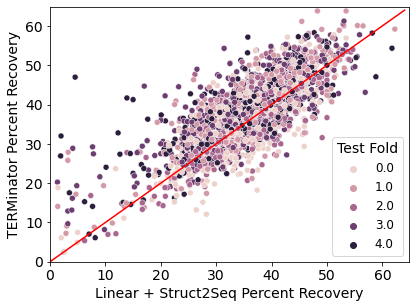

In [40]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = compare_models['recovery'], x = 'linear_s2s', y='TERMinator_noreg', ax=ax, hue=compare_models['test_fold', 'TERMinator_noreg'])
ax.legend(title = 'Test Fold')
ax.plot(np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), c='red')
ax.set_xlabel('Linear + Struct2Seq Percent Recovery')
ax.set_ylabel('TERMinator Percent Recovery')
ax.set_xlim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)
ax.set_ylim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)

fig.tight_layout()
fig.savefig('TERMinatorNoRegvsLinearS2S.jpg')

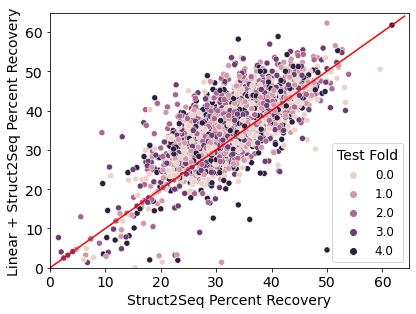

In [41]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = compare_models['recovery'], x = 's2s', y='linear_s2s', ax=ax, hue=compare_models['test_fold', 'TERMinator_noreg'])
ax.legend(title = 'Test Fold')
ax.plot(np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), c='red')
ax.set_xlabel('Struct2Seq Percent Recovery')
ax.set_ylabel('Linear + Struct2Seq Percent Recovery')
ax.set_xlim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)
ax.set_ylim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)

fig.tight_layout()
fig.savefig('LinearS2SvsS2S.jpg')

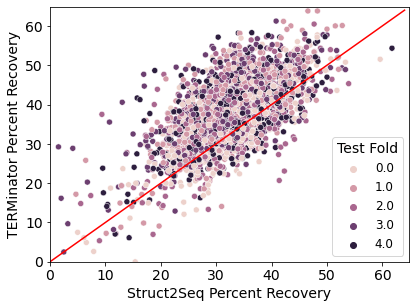

In [42]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = compare_models['recovery'], x = 's2s', y='TERMinator_noreg', ax=ax, hue=compare_models['test_fold', 'TERMinator_noreg'])
ax.legend(title = 'Test Fold')
ax.plot(np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), np.arange(0, compare_models['recovery', 'TERMinator_noreg'].max()+1), c='red')
ax.set_xlabel('Struct2Seq Percent Recovery')
ax.set_ylabel('TERMinator Percent Recovery')
ax.set_xlim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)
ax.set_ylim(0, compare_models['recovery', 'TERMinator_noreg'].max()+1)

fig.tight_layout()
fig.savefig('TERMinatorNoRegvsS2S.jpg')

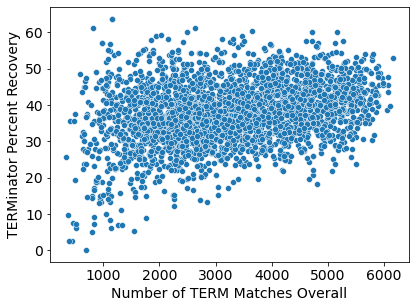

In [30]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = combined_data[combined_data['model'] == 'TERMinator_noreg'], y = 'recovery', x = 'term_len')
ax.set_ylabel('TERMinator Percent Recovery')
ax.set_xlabel('Number of TERM Matches Overall')

fig.tight_layout()
fig.savefig('NumberTERMMatches.jpg')

(0.0, 50.0)

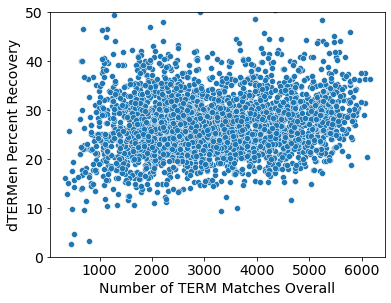

In [31]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = combined_data[combined_data['model'] == 'dTERMen'], y = 'recovery', x = 'term_len')
ax.set_ylabel('dTERMen Percent Recovery')
ax.set_xlabel('Number of TERM Matches Overall')
ax.set_ylim([0, 50])

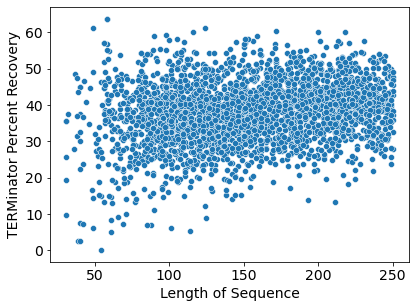

In [32]:
fig, ax = plt.subplots(figsize=(6, 4.5))
sns.scatterplot(data = combined_data[combined_data['model'] == 'TERMinator_noreg'], y = 'recovery', x = 'seq_len')
ax.set_ylabel('TERMinator Percent Recovery')
ax.set_xlabel('Length of Sequence')

fig.tight_layout()
fig.savefig('SequenceLength.jpg')

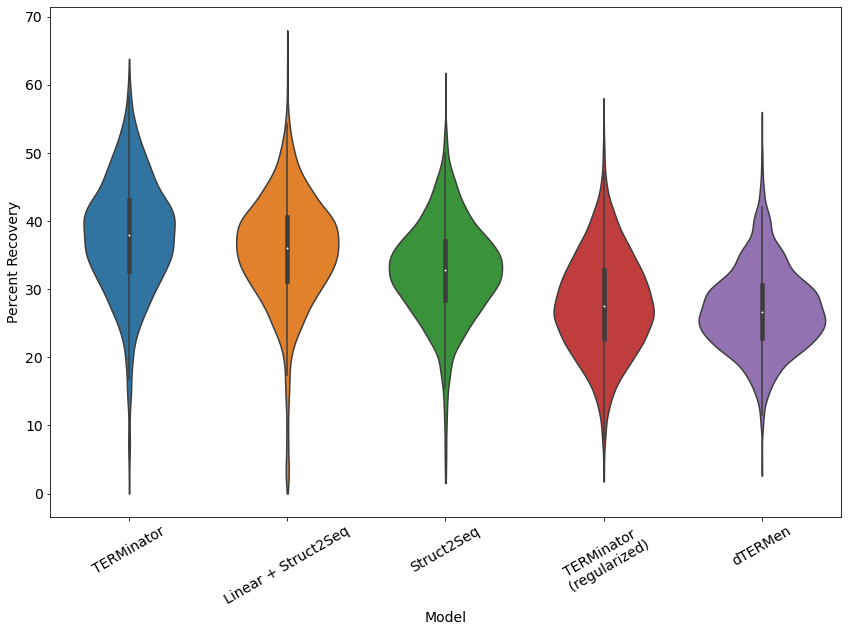

In [37]:
fig, ax = plt.subplots(figsize=(12,9))
sns.violinplot(data = compare_models['recovery'], cut = 0, ax = ax, order=['TERMinator_noreg', 'linear_s2s', 's2s', 'TERMinator_reg', 'dTERMen'])
ax.set_xlabel('Model')
ax.set_ylabel('Percent Recovery')
ax.set_xticklabels(['TERMinator', 'Linear + Struct2Seq', 'Struct2Seq', 'TERMinator\n (regularized)', 'dTERMen'], rotation=30)

fig.tight_layout()
fig.savefig('PerformanceViolin.jpg')

In [35]:
compare_models['recovery'].mean()

model
TERMinator_noreg    37.759292
TERMinator_reg      27.778556
dTERMen             26.995637
linear_s2s          35.563981
s2s                 32.669142
dtype: float64

In [118]:
import pickle

with open('/scratch/users/vsundar/TERMinator/outputs/test_run_fold0_pyold/training_curves.pk', 'rb') as f:
    training_curve_reg = pickle.load(f)
with open('/scratch/users/vsundar/TERMinator/outputs/test_run_fold0_pyold_noreg/training_curves.pk', 'rb') as f:
    training_curve_noreg = pickle.load(f)

In [119]:
training_curve_reg = np.array(training_curve_reg)
training_curve_noreg = np.array(training_curve_noreg)

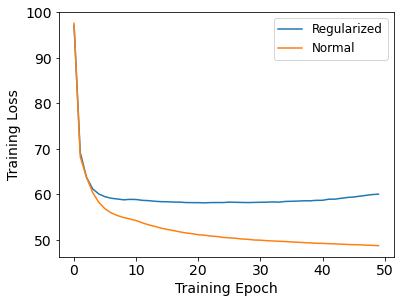

In [120]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(range(len(training_curve_reg)), training_curve_reg[:, 0], label='Regularized')
ax.plot(range(len(training_curve_noreg)), training_curve_noreg[:, 0], label='Normal')
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Training Loss')
ax.legend()

fig.savefig('RegularizationTraining.jpg')

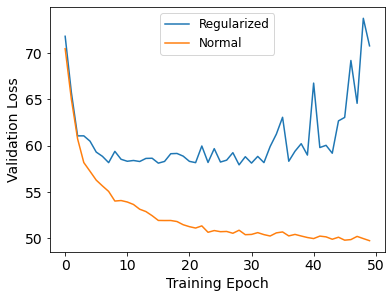

In [121]:
fig, ax = plt.subplots(figsize=(6, 4.5))
ax.plot(range(len(training_curve_reg)), training_curve_reg[:, 1], label='Regularized')
ax.plot(range(len(training_curve_noreg)), training_curve_noreg[:, 1], label='Normal')
ax.set_xlabel('Training Epoch')
ax.set_ylabel('Validation Loss')
ax.legend()

fig.savefig('RegularizationValidation.jpg')